In [10]:
!pip install opencv-python


In [7]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
import os
print(os.path.isfile('C:/Users/nisar/OneDrive/Documents/code/module/test_image/dhoni.jpg')) 


True


In [9]:
img = cv2.imread('C:/Users/nisar/OneDrive/Documents/code/module/test_image/dhoni.jpg')
img.shape

(225, 225, 3)

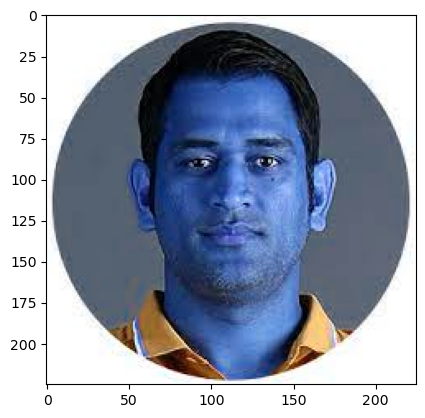

In [10]:
plt.imshow(img)

In [11]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(225, 225)

In [12]:
gray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

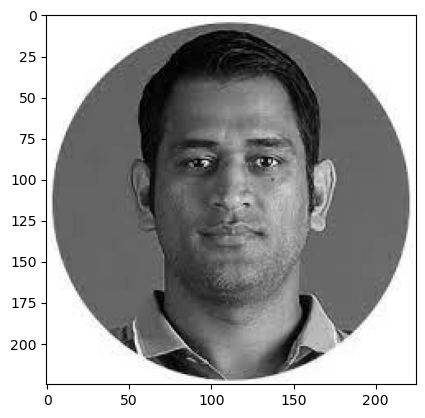

In [13]:
plt.imshow(gray, cmap='gray')

In [14]:
import cv2
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 50,  39, 129, 129]])

In [15]:
print('Eye cascade loaded:', not eye_cascade.empty())

Eye cascade loaded: True


In [16]:
(x,y,w,h) = faces[0]
x,y,w,h


(50, 39, 129, 129)

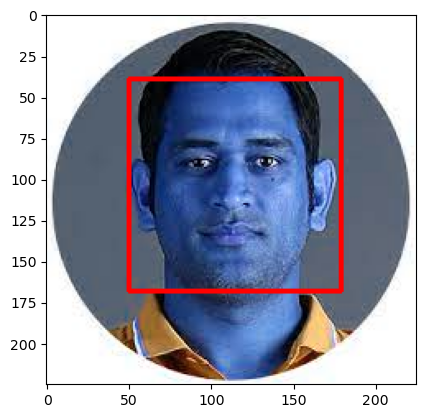

In [17]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

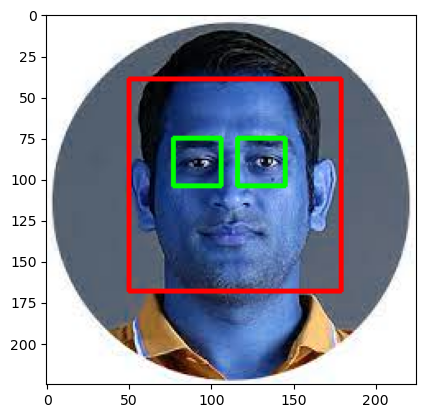

In [18]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)#red
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)#green

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

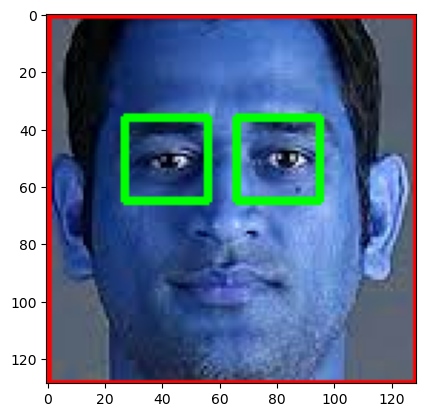

In [19]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [20]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

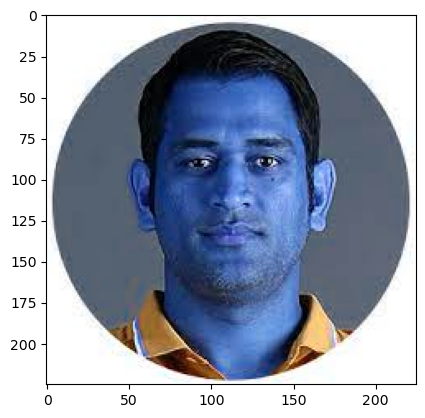

In [21]:
original_image = cv2.imread('C:/Users/nisar/OneDrive/Documents/code/module/test_image/dhoni.jpg')
plt.imshow(original_image)

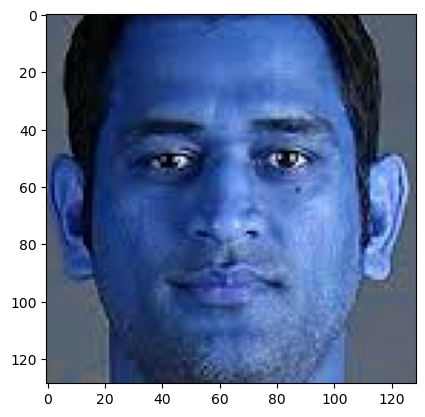

In [22]:
cropped_image = get_cropped_image_if_2_eyes('C:/Users/nisar/OneDrive/Documents/code/module/test_image/dhoni.jpg')
plt.imshow(cropped_image)

In [23]:
path_to_data = "C:/Users/nisar/OneDrive/Documents/code/module/datasets/"
path_to_cr_data = "C:/Users/nisar/OneDrive/Documents/code/module/datasets/cropped/"


In [24]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)


In [25]:
img_dirs

['C:/Users/nisar/OneDrive/Documents/code/module/datasets/Jasprit Bumrah',
 'C:/Users/nisar/OneDrive/Documents/code/module/datasets/KL Rahul',
 'C:/Users/nisar/OneDrive/Documents/code/module/datasets/MS Dhoni',
 'C:/Users/nisar/OneDrive/Documents/code/module/datasets/Rohit Sharma',
 'C:/Users/nisar/OneDrive/Documents/code/module/datasets/Sachin Tendulkar',
 'C:/Users/nisar/OneDrive/Documents/code/module/datasets/Shubman Gill',
 'C:/Users/nisar/OneDrive/Documents/code/module/datasets/Virat Koholi']

In [26]:
import shutil
if os.path.exists(path_to_cr_data): #if folder exist then remove it
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data) # create that foalder

In [27]:
{
    'MS Dhoni': [
        'C:/Users/nisar/OneDrive/Documents/code/module/datasets/MS Dhoni/d1'
        'C:/Users/nisar/OneDrive/Documents/code/module/datasets/MS Dhoni/d2'
    ],
    'Virat Koholi': [
        'C:/Users/nisar/OneDrive/Documents/code/module/datasets/Virat Koholi/k1'
        'C:/Users/nisar/OneDrive/Documents/code/module/datasets/Virat Koholi/d2'
    ]
}

{'MS Dhoni': ['C:/Users/nisar/OneDrive/Documents/code/module/datasets/MS Dhoni/d1C:/Users/nisar/OneDrive/Documents/code/module/datasets/MS Dhoni/d2'],
 'Virat Koholi': ['C:/Users/nisar/OneDrive/Documents/code/module/datasets/Virat Koholi/k1C:/Users/nisar/OneDrive/Documents/code/module/datasets/Virat Koholi/d2']}

In [28]:
cropped_image_dirs = [] 
cricketers_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    cricketers_name = img_dir.split('/')[-1] 
    print(cricketers_name)
    
    cricketers_file_names_dict[cricketers_name] = []
    
    for entry in os.scandir(img_dir): 
        roi_color= get_cropped_image_if_2_eyes(entry.path) 
        if roi_color is not None: 
            cropped_folder = path_to_cr_data + cricketers_name 
            if not os.path.exists(cropped_folder): 
                os.makedirs(cropped_folder) 
                cropped_image_dirs.append(cropped_folder) 
                print("Inserting cropped images in folder: ", cropped_folder)

            cropped_file_name = cricketers_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            cricketers_file_names_dict[cricketers_name].append(cropped_file_path)
            count += 1

Jasprit Bumrah
Inserting cropped images in folder:  C:/Users/nisar/OneDrive/Documents/code/module/datasets/cropped/Jasprit Bumrah
KL Rahul
Inserting cropped images in folder:  C:/Users/nisar/OneDrive/Documents/code/module/datasets/cropped/KL Rahul
MS Dhoni
Inserting cropped images in folder:  C:/Users/nisar/OneDrive/Documents/code/module/datasets/cropped/MS Dhoni
Rohit Sharma
Inserting cropped images in folder:  C:/Users/nisar/OneDrive/Documents/code/module/datasets/cropped/Rohit Sharma
Sachin Tendulkar
Inserting cropped images in folder:  C:/Users/nisar/OneDrive/Documents/code/module/datasets/cropped/Sachin Tendulkar
Shubman Gill
Inserting cropped images in folder:  C:/Users/nisar/OneDrive/Documents/code/module/datasets/cropped/Shubman Gill
Virat Koholi
Inserting cropped images in folder:  C:/Users/nisar/OneDrive/Documents/code/module/datasets/cropped/Virat Koholi


In [29]:
import numpy as np
import pywt
import cv2

def w2d(img, mode ="haar", level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale 
    imArray = cv2.cvtColor(imArray, cv2.COLOR_BGR2GRAY) 
    #convert to flout 
    imArray = np.float32(imArray) 
    imArray /= 255;
    #compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #process coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    #reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255; 
    imArray_H = np.uint8(imArray_H)

    return imArray_H


In [30]:
print(type(img), img.shape if isinstance(img, np.ndarray) else "Not an array")


<class 'numpy.ndarray'> (225, 225, 3)


In [31]:
img = cv2.imread('C:/Users/nisar/OneDrive/Documents/code/module/test_image/dhoni.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # if needed
w2d(img, 'haar', 1)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

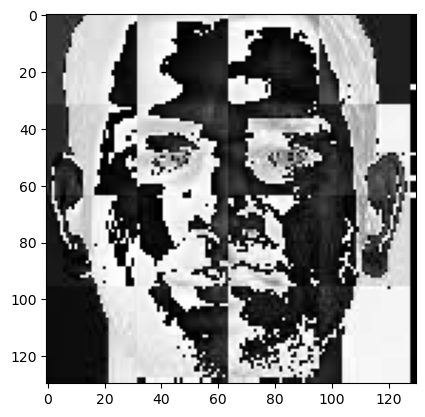

In [32]:
im_har = w2d(cropped_image, 'db1',5) 
plt.imshow(im_har, cmap="gray")

In [33]:
cricketers_file_names_dict

{'Jasprit Bumrah': ['C:/Users/nisar/OneDrive/Documents/code/module/datasets/cropped/Jasprit Bumrah/Jasprit Bumrah1.png',
  'C:/Users/nisar/OneDrive/Documents/code/module/datasets/cropped/Jasprit Bumrah/Jasprit Bumrah2.png',
  'C:/Users/nisar/OneDrive/Documents/code/module/datasets/cropped/Jasprit Bumrah/Jasprit Bumrah3.png',
  'C:/Users/nisar/OneDrive/Documents/code/module/datasets/cropped/Jasprit Bumrah/Jasprit Bumrah4.png',
  'C:/Users/nisar/OneDrive/Documents/code/module/datasets/cropped/Jasprit Bumrah/Jasprit Bumrah5.png',
  'C:/Users/nisar/OneDrive/Documents/code/module/datasets/cropped/Jasprit Bumrah/Jasprit Bumrah6.png',
  'C:/Users/nisar/OneDrive/Documents/code/module/datasets/cropped/Jasprit Bumrah/Jasprit Bumrah7.png',
  'C:/Users/nisar/OneDrive/Documents/code/module/datasets/cropped/Jasprit Bumrah/Jasprit Bumrah8.png',
  'C:/Users/nisar/OneDrive/Documents/code/module/datasets/cropped/Jasprit Bumrah/Jasprit Bumrah9.png',
  'C:/Users/nisar/OneDrive/Documents/code/module/datase

In [34]:
class_dict = {}
count = 0
for cricketers_name in cricketers_file_names_dict.keys():
    class_dict[cricketers_name] = count
    count = count + 1
class_dict

{'Jasprit Bumrah': 0,
 'KL Rahul': 1,
 'MS Dhoni': 2,
 'Rohit Sharma': 3,
 'Sachin Tendulkar': 4,
 'Shubman Gill': 5,
 'Virat Koholi': 6}

In [35]:
x,y = [], []
for cricketers_name, training_files in cricketers_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))       # color image (32, 32, 3)
        img_har = w2d(img, 'db1', 5)                      # wavelet transform
        scalled_img_har = cv2.resize(img_har, (32, 32))   # single channel (32, 32)

        combined_img = np.vstack((
          scalled_raw_img.reshape(32*32*3, 1), 
          scalled_img_har.reshape(32*32, 1)
        ))
        x.append(combined_img)
        y.append(class_dict[cricketers_name])

In [36]:
len(x[0])

4096

In [37]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(245, 4096)

In [38]:
x[0]

array([255., 255., 255., ..., 251., 248., 252.])

In [39]:
# we will use support with rbf kernel turned with heuristic fineturing to train our model 

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [40]:
x = np.array(x).reshape(len(x), 4096).astype(float)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, stratify=y)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score (X_test, y_test)

0.7741935483870968

In [41]:
print("x shape:", np.array(x).shape)
print("y shape:", np.array(y).shape)
print("y:", y)



x shape: (245, 4096)
y shape: (245,)
y: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]


In [42]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.83      0.50      0.62        10
           2       0.82      0.82      0.82        11
           3       1.00      0.67      0.80         6
           4       1.00      1.00      1.00         6
           5       1.00      0.88      0.93         8
           6       0.52      0.92      0.67        13

    accuracy                           0.77        62
   macro avg       0.88      0.77      0.80        62
weighted avg       0.84      0.77      0.78        62



In [49]:
#use gridserach cv 
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [50]:
model_params = {
    'svm': {
        'model': SVC(probability=True),
        'params': {
            'svc__C': [1, 10, 100],         
            'svc__gamma': ['scale', 'auto']
        }
   },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [10, 50, 100]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'logisticregression__C': [0.1, 1, 10]
        }
   }
 }

In [51]:

scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline (StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame (scores, columns=['model', 'best_score', 'best_params'])
df

C:\Users\nisar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nisar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

,model,best_score,best_params
0,svm,0.694444,NaN
1,random_forest,0.716066,NaN
2,LogisticRegression,0.737838,NaN


In [52]:
best_estimators['svm'].score(X_test, y_test)


0.7741935483870968

In [53]:
best_estimators['random_forest'].score(X_test, y_test)

0.6774193548387096

In [54]:
best_estimators['LogisticRegression'].score(X_test, y_test)

0.8064516129032258

In [55]:
   best_clf = best_estimators['svm']

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 5,  0,  0,  0,  0,  0,  3],
       [ 0,  5,  0,  0,  0,  0,  5],
       [ 0,  0,  9,  0,  0,  0,  2],
       [ 0,  0,  1,  4,  0,  0,  1],
       [ 0,  0,  0,  0,  6,  0,  0],
       [ 0,  0,  1,  0,  0,  7,  0],
       [ 0,  1,  0,  0,  0,  0, 12]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

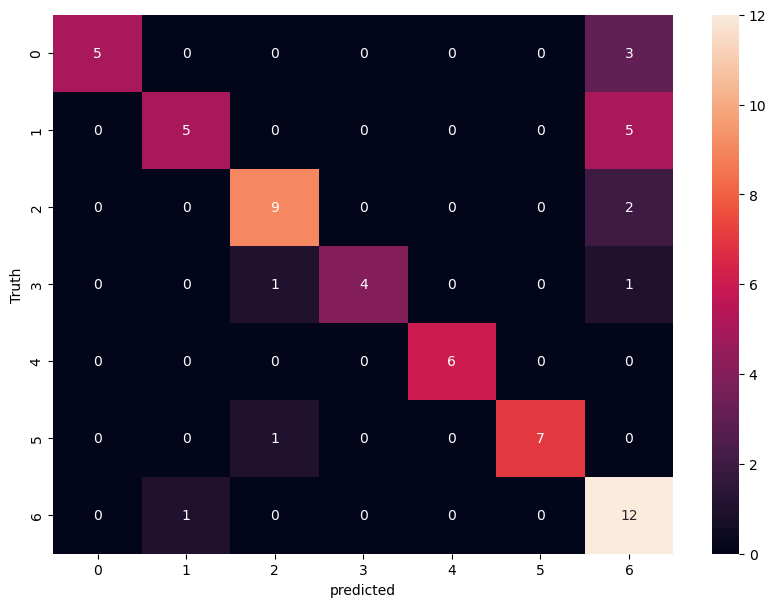

In [57]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [58]:
class_dict

{'Jasprit Bumrah': 0,
 'KL Rahul': 1,
 'MS Dhoni': 2,
 'Rohit Sharma': 3,
 'Sachin Tendulkar': 4,
 'Shubman Gill': 5,
 'Virat Koholi': 6}

In [62]:
#saved the trained model
!pip install joblib
import joblib
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [63]:
#save class dictionary
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [65]:
import os
print(os.listdir())

['.conda', '.condarc', '.continuum', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.ms-ad', '.vscode', 'anaconda3', 'AppData', 'Application Data', 'class_dictionary.json', 'Contacts', 'Cookies', 'dictionary nisarga.ipynb', 'Documents', 'Downloads', 'Favorites', 'image classification.ipynb', 'Links', 'Local Settings', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{fd3255ea-6cc8-11ed-b0ca-c475abb37a62}.TM.blf', 'NTUSER.DAT{fd3255ea-6cc8-11ed-b0ca-c475abb37a62}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{fd3255ea-6cc8-11ed-b0ca-c475abb37a62}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'PDFEditor', 'PrintHood', 'Recent', 'Saved Games', 'saved_model.pk1', 'saved_model.pkl', 'Searches', 'SendTo', 'Start Menu', 'string nisarga.ipynb', 'Templates', 'Untitled.ipynb', 'Untitled1.ipynb', 'Untitled10.ipynb', 'Untitled2.ipynb', 'Untitled3.ipynb', 'Untitled4.ipynb', 'Untitled5.ipynb', 'Unti